# Predição da Qualidade de Vinhos Portugueses

Neste estudo vamos analisar algumas propriedades químicas de amostras de vinhos portugueses <br>
Nosso objetivo é identificar a viabilidade da criação de um modelo preditivo, <br>
que seja capaz de classificar vinhos por nível de qualidade.

### Starting out - Aqui algumas bibliotecas necessárias para nossa análise

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
sns.set_style('whitegrid')

### Loading & Shooting - Hora de carregar os dados em um Dataframe

In [77]:
df_wine = pd.read_csv("data/winequality.csv", sep=";")
df_size = len(df_wine)
print("Tamanho do Dataset:", df_size)
df_wine.head()

Tamanho do Dataset: 6497


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [78]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   object 
 12  quality               6497 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


Olhando superficialmente o dataset vemos que se tratam de dados dados estruturados, as features são númericas com ponto flutuante, sendo apenas a coluna **type** do tipo **categórica**, vamos tratar dela mais a frente.

Todavia vale notar que a coluna alcohol foi importada como object e não como float64, isso geralmente denota que tem algum item possui formato incorreto. 

Vamos então tentar encontrar o erro e corrigir esse dataset antes de seguir:

In [79]:
count = 0
error_list = set({})
for index, row in df_wine.iterrows():
    try:
        number = float(row["alcohol"])
    except:
        error_list.add(row["alcohol"])

error_list    

{'100.333.333.333.333',
 '101.333.333.333.333',
 '104.666.666.666.667',
 '105.333.333.333.333',
 '105.666.666.666.667',
 '109.333.333.333.333',
 '109.666.666.666.667',
 '110.666.666.666.667',
 '112.666.666.666.667',
 '113.333.333.333.333',
 '113.666.666.666.667',
 '114.333.333.333.333',
 '114.666.666.666.667',
 '116.333.333.333.333',
 '117.333.333.333.333',
 '120.666.666.666.667',
 '123.333.333.333.333',
 '128.933.333.333.333',
 '131.333.333.333.333',
 '135.666.666.666.667',
 '923.333.333.333.333',
 '953.333.333.333.333',
 '956.666.666.666.667',
 '963.333.333.333.333',
 '973.333.333.333.333'}

Ótimo achamos o problema, esses valores com muitos pontos estão incorretos. Ao abrirmos o arquivo original vemos que na verdade faltou o ponto fluante e no processo de importação ele foi considerado como um número muito grande.

Vamos ver quais então são os valores únicos dessa coluna:

In [80]:
[item for item in list(np.sort(df_wine["alcohol"].unique())) if item not in error_list]

array(['10', '10.1', '10.15', '10.2', '10.3', '10.4', '10.5', '10.55',
       '10.6', '10.65', '10.7', '10.75', '10.8', '10.9', '10.98',
       '100.333.333.333.333', '101.333.333.333.333',
       '104.666.666.666.667', '105.333.333.333.333',
       '105.666.666.666.667', '109.333.333.333.333',
       '109.666.666.666.667', '11', '11.05', '11.1', '11.2', '11.3',
       '11.35', '11.4', '11.45', '11.5', '11.55', '11.6', '11.65', '11.7',
       '11.75', '11.8', '11.85', '11.9', '11.94', '11.95',
       '110.666.666.666.667', '112.666.666.666.667',
       '113.333.333.333.333', '113.666.666.666.667',
       '114.333.333.333.333', '114.666.666.666.667',
       '116.333.333.333.333', '117.333.333.333.333', '12', '12.05',
       '12.1', '12.15', '12.2', '12.25', '12.3', '12.4', '12.5', '12.6',
       '12.7', '12.75', '12.8', '12.9', '120.666.666.666.667',
       '123.333.333.333.333', '128.933.333.333.333', '13', '13.05',
       '13.1', '13.2', '13.3', '13.4', '13.5', '13.55', '13.6', '13.7'

Verificando os demais valores podemos concluir que os valores estão com erro de pontuação, sendo que o maior valor para essa coluna é 14.9 e o menor é 8.8 vamos então aplicar um fix rápido.

In [81]:
def fix_value(value):
       
    new_value = value.replace(".", "")
    if value in error_list:
        value = float(new_value[:1] + "." + new_value[1:]) if value[:1] == '9' else float(new_value[:2] + "." + new_value[2:]) 
    else:
        value = float(value)
    return value


In [82]:
df_wine["alcohol"] = df_wine["alcohol"].apply(fix_value)

In [83]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [84]:
# Prontinho dataset corrigido!
df_wine.tail(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,Red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,Red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6489,Red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6490,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,Red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,Red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### EDA - Exploratory Data Analysis

Antes de criarmos um modelo de predição precisamos explorar um pouco mais os dados que temos, é importante entender qual a distribuição das amostras de acordo com a feature target (ŷ) que pretendemos prever, além de identificar eventuais campos nulos que deverão ser tratados.

#### 1- Vamos verificar quantas amostras temos para cada nível de qualidade:

In [85]:
pd.DataFrame(df_wine["quality"]).groupby("quality")["quality"].aggregate(["count"]).sort_values("count", ascending=False)

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


Nossas amostras apresentam níveis de qualidade que vão de 3 à 9. No mundo real os dados quase nunca são balanceados, neste caso não é diferente. Para vinhos de qualidade mínima (**3**) temos apenas **30** amostras.  Vinhos de nota máxima (**9**) são 5 únicas amostras dentre outras 6497, ou seja, uma representatividade amostral muito irrisória.

In [86]:
print("Percentual de Amostras de Qualidade 6: {0:.2f}%".format((2836/df_size)*100))

Percentual de Amostras de Qualidade 6: 43.65%


A maior parte dos dados (cerca de **93%** das amostras) são sobre vinhos medianos (**5,6,7**). Nesse cenário uma simples função que faça ŷ = 6 acertaria 43,6% dos casos. Portanto veremos que acurácia não será a melhor forma de avaliar um modelo de predição para esse dataset.

#### 2 - Plotting to see better - Uma histograma pode falar melhor sobre onde se concentram nossos dados
Abaixo podemos ver que inclusive a maior concentração de amostras está entre os vinhos de qualidade 5 e 6. 

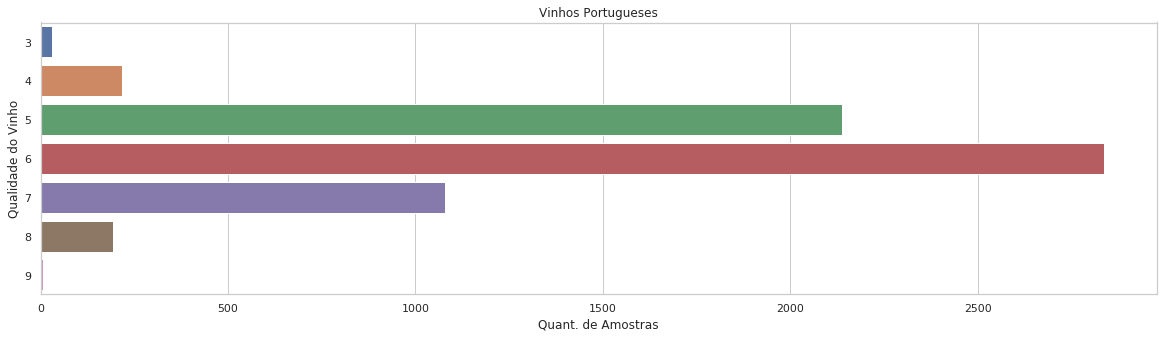

In [87]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data=df_wine, y="quality")
ax.set(ylabel='Qualidade do Vinho', xlabel='Quant. de Amostras', title="Vinhos Portugueses")
plt.show()

O que acontece quando plotamos se o tipo vinho é branco ou vermelho?

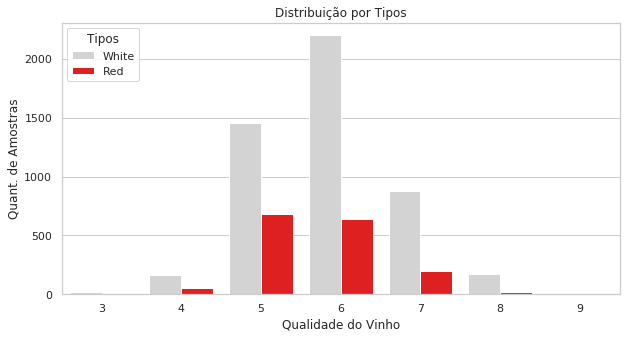

In [88]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data=df_wine, x="quality", hue="type", palette=['lightgrey', 'red'])
ax.set(xlabel='Qualidade do Vinho', ylabel='Quant. de Amostras', title="Distribuição por Tipos")
plt.legend(title='Tipos')
plt.show()

Podemos então verificar que a maior parte das amostras são de vinhos do tipo branco. 
Abaixo podemos ver que das 35 ocorrências de qualidade 3 e 9, 25 são de vinhos brancos.

In [89]:
df_wine[(df_wine["quality"] == 3) | (df_wine["quality"] == 9)].groupby(["quality", "type"])["quality"].aggregate(["count"]).sort_values("count", ascending=False)

count
quality type        
3       White     20
        Red       10
9       White      5

#### 3 - Missing Values - Verificando se há valores nulos

In [90]:
df_wine.isnull().any()

type                    False
fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Ótimo! Nenhum valor nulo, podemos seguir com os próximos passos!

#### 4 - Correlation Matrix - Verificando correlações 

Antes de seguirmos precisamos transformar a coluna categórica (**Type**) em numérica. Como trata-se de duas categorias podemos utilizar os valores 1 e 0 para vinhos brancos e tintos respectivamente. Caso houvessem mais de 2 tipos de vinho, a utilização de one-hot encoding seria necessária.

In [91]:
df_wine["type"] = np.where(df_wine["type"]=="White", 1, 0)

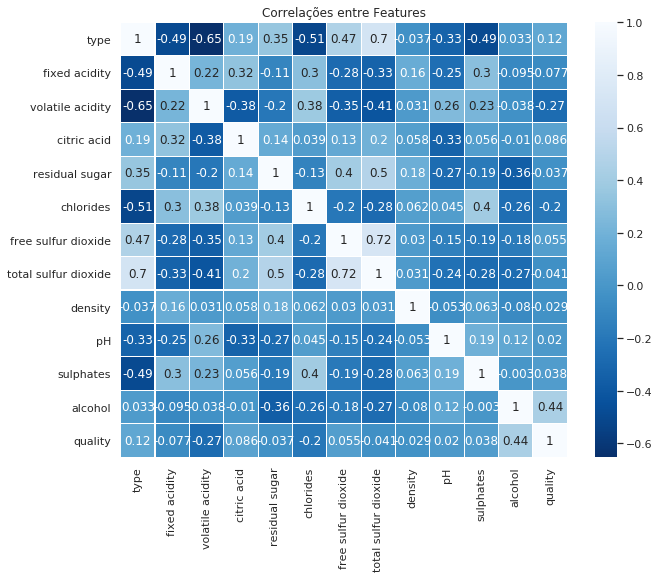

In [92]:
df_corr = df_wine.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_corr, annot=True, cmap="Blues_r", linewidths=.1)
ax.set(title="Correlações entre Features")
plt.show()

Ao analisarmos as correlações entre colunas vemos que o teor alcólico é a que possui maior correlação com qualidade, porém ainda inferior que 0.5, além disso temos duas pequenas correlações inversas com as colunas *chlorides* e *volatile acidity*.

Vale notar que existem algumas poucas correlações entre atributos, e um ponto muito interessante: muitas featuras possuem correlação alta (maior que 0.5) com o tipo do vinho, se o desafio fosse predizer o tipo do vinho teríamos mais chances de acertar. 

#### 5 - Top Features - Selecionando e identificando as Features que fazem acontecer 

In [232]:
# Algumas bibliotecas do sckit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Aqui dividimos o dataframe em features e na target
features_name = list(df_wine.columns[:-1])
features_name

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [317]:
x_features = df_wine[features_name]
y_hat = df_wine[df_wine.columns[-1]]

In [318]:
print(x_features.shape, y_hat.shape)

(6497, 12) (6497,)


In [326]:
#Treino
random_seed = 100 # aqui fixamos a seed randomica para garantir a reprodutibilidade
rf_clf = RandomForestClassifier(random_state=random_seed, n_estimators=20, max_depth=14)
rf_clf.fit(x_features, y_hat)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [327]:
print("Score Treino com todas as amostras...")
print(rf_clf.score(x_features, y_hat))

Score Treino com todas as amostras...
0.9602893643219947


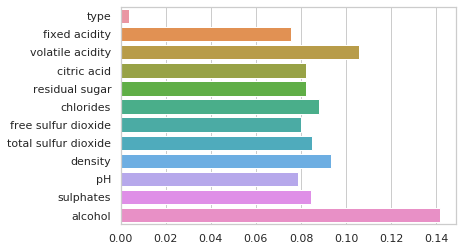

In [328]:
sns.barplot(rf_clf.feature_importances_, features_name);

Tanto pela correlação (Pearson Correlation) quando verificamos o resultado do treino que fizemos com uma Randon Forest o teor alcólico ( Feature alcohol) se destaca bastante, e a coluna Type parece não agregar muito.

### Model Creating - Hora de Criar  o Modelo Preditivo!

Temos uma grande concentração de amostras em apenas três dos 7 níveis de qualidade. Por ser um datase relativamente pequeno(menos de 10 mil amostras) um modelo bastante funcional neste caso seria uma Decision Tree ou uma Randon Forest.

Vamos utilizar train_test_split com estratificação das amostras pelo valor de target (y) que é um forma simples e rápida de se testar nossas predições.

Assim garantimos que cada teste contenha amostras dos 7 tipos de qualidade.

Existe um trade off aqui: aumentar a amostra de teste "melhora" nosso teste, porém diminui as oportunidades de treino. Portanto, vamos usar 15% do dataset para testes.

In [339]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report

#Agora vamos treinar importante garantir que o teste contenha pelo menos uma amostra
#do grupo mais raro (vinhos de qualidade 9)
X_train, X_test, y_train, y_test = train_test_split(x_features, y_hat, test_size=0.15, random_state=random_seed, stratify=y_hat)
rfc = RandomForestClassifier(random_state=random_seed, n_estimators=25, max_depth=13)
rfc.fit(X_train, y_train)

# Hora de testar
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions, zero_division=False))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.06      0.11        32
           5       0.72      0.68      0.70       321
           6       0.61      0.80      0.70       426
           7       0.74      0.46      0.57       162
           8       0.90      0.31      0.46        29
           9       0.00      0.00      0.00         1

    accuracy                           0.66       975
   macro avg       0.47      0.33      0.36       975
weighted avg       0.67      0.66      0.64       975



E se utilizarmos menos features? Se retirarmos a coluna type que parece ser a menos relevante conforme nosso EDA? 

In [333]:
min_features = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']
x_min_features =  df_wine[min_features]

In [334]:
X_train, X_test, y_train, y_test = train_test_split(x_min_features, y_hat, test_size=0.15, random_state=random_seed, stratify=y_hat)

rfc = RandomForestClassifier(random_state=random_seed, n_estimators=25, max_depth=13)
rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions, zero_division=False))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.57      0.12      0.21        32
           5       0.72      0.67      0.70       321
           6       0.62      0.80      0.70       426
           7       0.74      0.51      0.60       162
           8       0.80      0.28      0.41        29
           9       0.00      0.00      0.00         1

    accuracy                           0.67       975
   macro avg       0.49      0.34      0.37       975
weighted avg       0.67      0.67      0.65       975



**Uma sutil mudança: aumentamos a acurácia em 1% mas perdemos com a precisão e recall da classe 8, portanto vamos continuar utilizando todas as features.**

### Hyper Parameters - Podemos tentar verificar quais parametros funcionam melhor

Vamos testar com GridSearch que funciona bem quando temos poucas amostras e estamos usando um modelo com fit rápido como o da Random Forest.

In [341]:
param_grid = {
                 "n_estimators": [10, 15, 20, 25, 30, 50, 100, 150, 200],
                 "max_depth": [8, 9, 10, 11, 12, 13, 14, 15, 20, 30],
                "max_features": [5, 6, 7, 8, 9, 10, 11, 12]
             }

In [343]:
from sklearn.model_selection import GridSearchCV

grid_rfc = GridSearchCV(rfc, param_grid, cv=5, verbose=True, n_jobs=4)
grid_rfc.fit(x_features, y_hat)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   32.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 12.1min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 16.6min
[Parallel(n_jobs=4)]: Done 3600 out of 3600 | elapsed: 19.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=13,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=25, n_jobs=None,
                                              oob_score=False, random_state=100,
                                    

In [344]:
grid_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [345]:
grid_rfc.best_params_

{'max_depth': 10, 'max_features': 6, 'n_estimators': 100}

Voilá! Depois de alguns minutos, a melhor configuração! ( pelo menos para esse cenário com amostras tão pequenas o random seed acaba afetando em muito o modelo) Vamos então utilizar esses parametros para mais uma rodada:

In [349]:
X_train, X_test, y_train, y_test = train_test_split(x_features, y_hat, test_size=0.15, random_state=random_seed, stratify=y_hat)
rfc_v1 = RandomForestClassifier(random_state=random_seed, n_estimators=25, max_depth=13)
rfc_v1.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(x_features, y_hat, test_size=0.15, random_state=random_seed, stratify=y_hat)
rfc_v2 = RandomForestClassifier(random_state=random_seed, n_estimators=100, max_depth=10, max_features=6)
rfc_v2.fit(X_train, y_train)

# Hora de testar
predictions_1 = rfc_v1.predict(X_test)
predictions_2 = rfc_v2.predict(X_test)

print("model 1")
print(classification_report(y_test, predictions_1, zero_division=False))
print("model 2")
print(classification_report(y_test, predictions_2, zero_division=False))

model 1
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.06      0.11        32
           5       0.72      0.68      0.70       321
           6       0.61      0.80      0.70       426
           7       0.74      0.46      0.57       162
           8       0.90      0.31      0.46        29
           9       0.00      0.00      0.00         1

    accuracy                           0.66       975
   macro avg       0.47      0.33      0.36       975
weighted avg       0.67      0.66      0.64       975

model 2
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.25      0.03      0.06        32
           5       0.67      0.64      0.66       321
           6       0.58      0.77      0.66       426
           7       0.65      0.39      0.49       162
           8       1.00      0.17      0.29        29
        

### Resultados

Comparando os resultados vimos que mesmo com GridSearch não existe uma grande melhora, já que a pequena quantidade de amostras em algumas classes torna os treinos insuficientes.

De qualquer forma o modelo 1 parece performar melhor, e como era esperado ele é muito melhor em classificar amostras do tipo 5, 6, 7 e com menor recall a 8. 

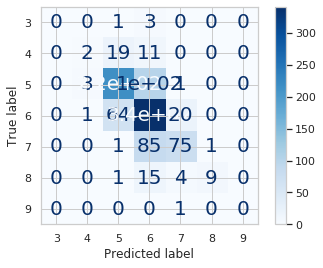

In [366]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc_v1, X_test, y_test, cmap = 'Blues')
plt.show()